In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV
data = pd.read_csv('Electric_Vehicle_Population_Data.csv')
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,35.0,240684006,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,35.0,474183811,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,43.0,113120017,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,108188713,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,20.0,176448940,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10


### 1. Composition (Manufacturer)

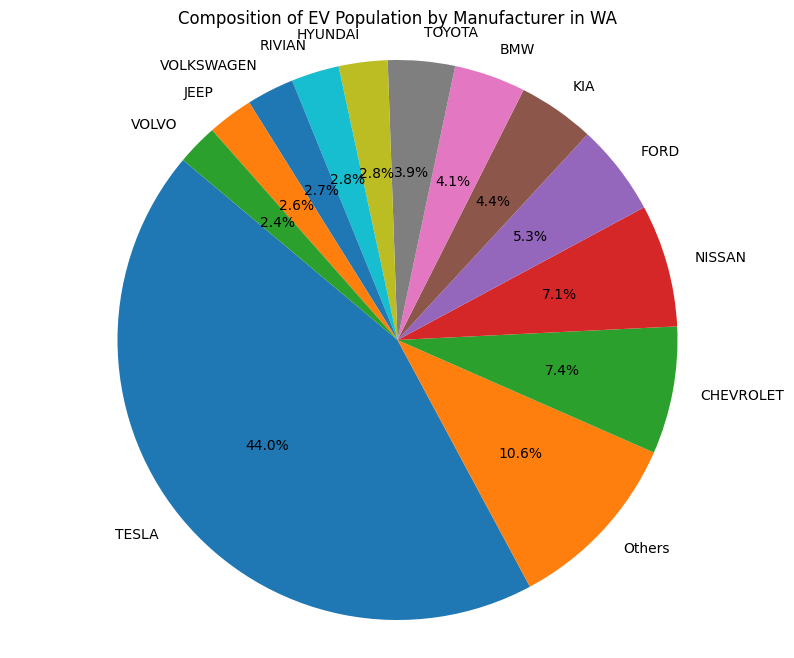

In [58]:
wa_data = data[data['State'] == 'WA']

# Group by manufacturer and count the number of EVs for each manufacturer
manufacturer_counts = wa_data.groupby('Make').size().reset_index(name='Count')

# Calculate the total number of EVs
total_ev_count = manufacturer_counts['Count'].sum()

# Calculate the percentage of each manufacturer
manufacturer_counts['Percentage'] = (manufacturer_counts['Count'] / total_ev_count) * 100

# Replace manufacturers with less than 3% with "Others"
manufacturer_counts.loc[manufacturer_counts['Percentage'] < 2, 'Make'] = 'Others'

# Group by manufacturer again to combine "Others"
manufacturer_counts = manufacturer_counts.groupby('Make').sum().reset_index()
manufacturer_counts = manufacturer_counts.sort_values(by='Count', ascending=False)

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(manufacturer_counts['Count'], labels=manufacturer_counts['Make'], autopct='%1.1f%%', startangle=140)
plt.title('Composition of EV Population by Manufacturer in WA')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()


### 1. Composition (Top 10 Energy Utility)

                                     Electric Utility  Count
72      PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)  75156
71                             PUGET SOUND ENERGY INC  42225
55       CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)  35647
34  BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...  11938
19  BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...   9100
73  PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...   4703
2   BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...   3317
30  BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...   1803
63                                         PACIFICORP   1594
32  BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF B...   1487


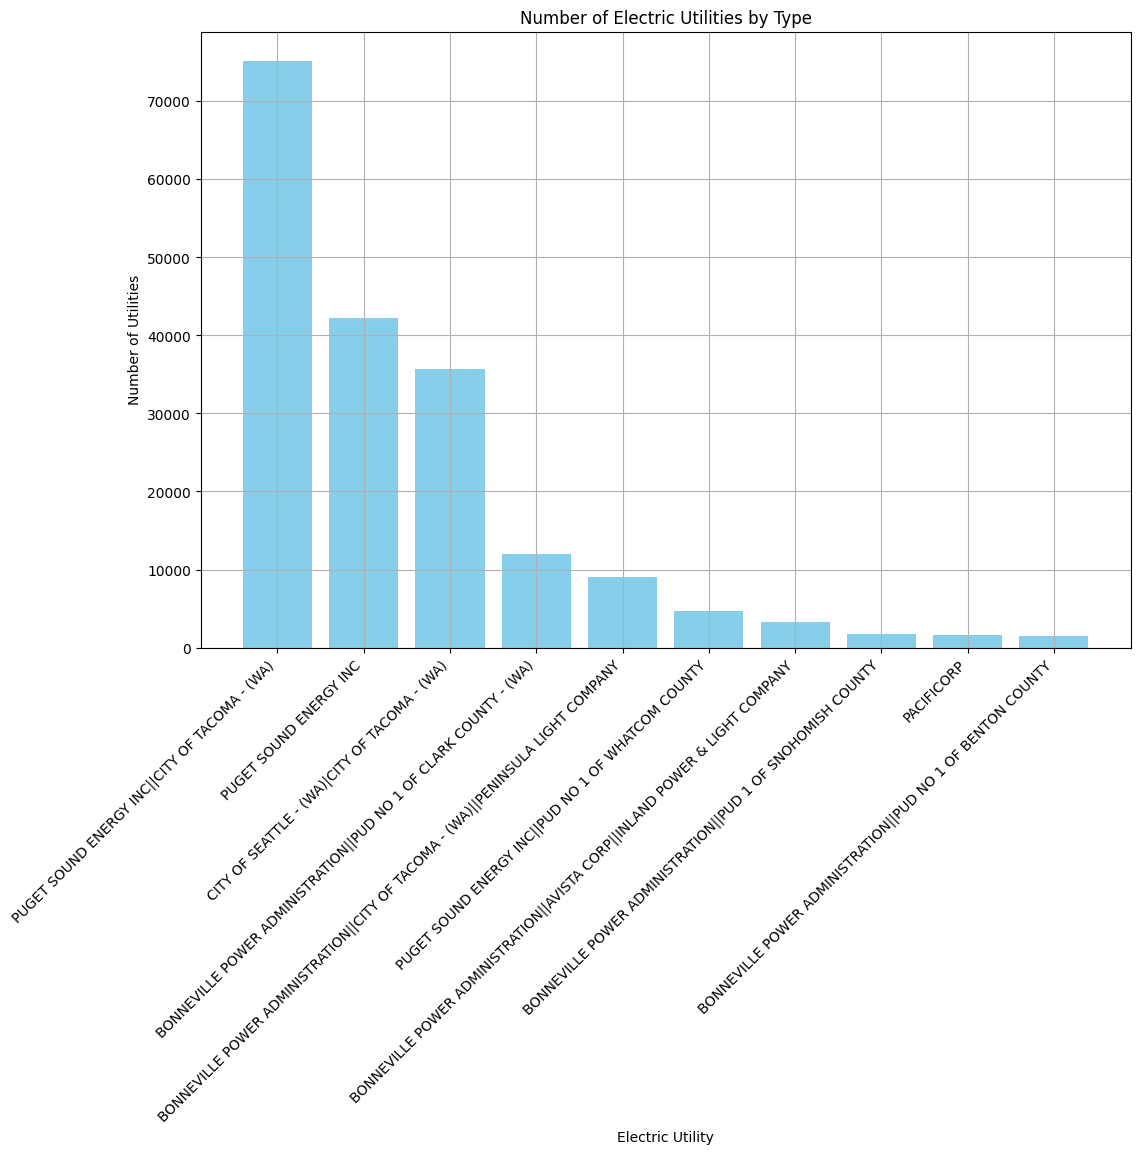

In [60]:

utility_counts = data.groupby('Electric Utility').size().reset_index(name='Count')

# Sort the utility types by the number of utilities in descending order
utility_counts = utility_counts.sort_values(by='Count', ascending=False).head(10)

# Display the results
print(utility_counts)

# Plotting the bar graph
plt.figure(figsize=(12, 8))
plt.bar(utility_counts['Electric Utility'], utility_counts['Count'], color='skyblue')
plt.xlabel('Electric Utility')
plt.ylabel('Number of Utilities')
plt.title('Number of Electric Utilities by Type')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Display the plot
plt.show()


### 2.	Best selling model of each brand (WA)

                   Brand        Best-Selling Model  Sales Count
36                 TESLA                   MODEL Y        43342
28                NISSAN                      LEAF        13476
7              CHEVROLET                   BOLT EV         6718
39            VOLKSWAGEN                      ID.4         4553
12                  FORD            MUSTANG MACH-E         4145
18                  JEEP                  WRANGLER         4034
8               CHRYSLER                  PACIFICA         3670
19                   KIA                      NIRO         3628
16               HYUNDAI                   IONIQ 5         3109
38                TOYOTA                RAV4 PRIME         3042
32                RIVIAN                       R1S         2922
5                    BMW                        X5         2593
40                 VOLVO                      XC90         1691
35                SUBARU                  SOLTERRA         1174
29              POLESTAR                

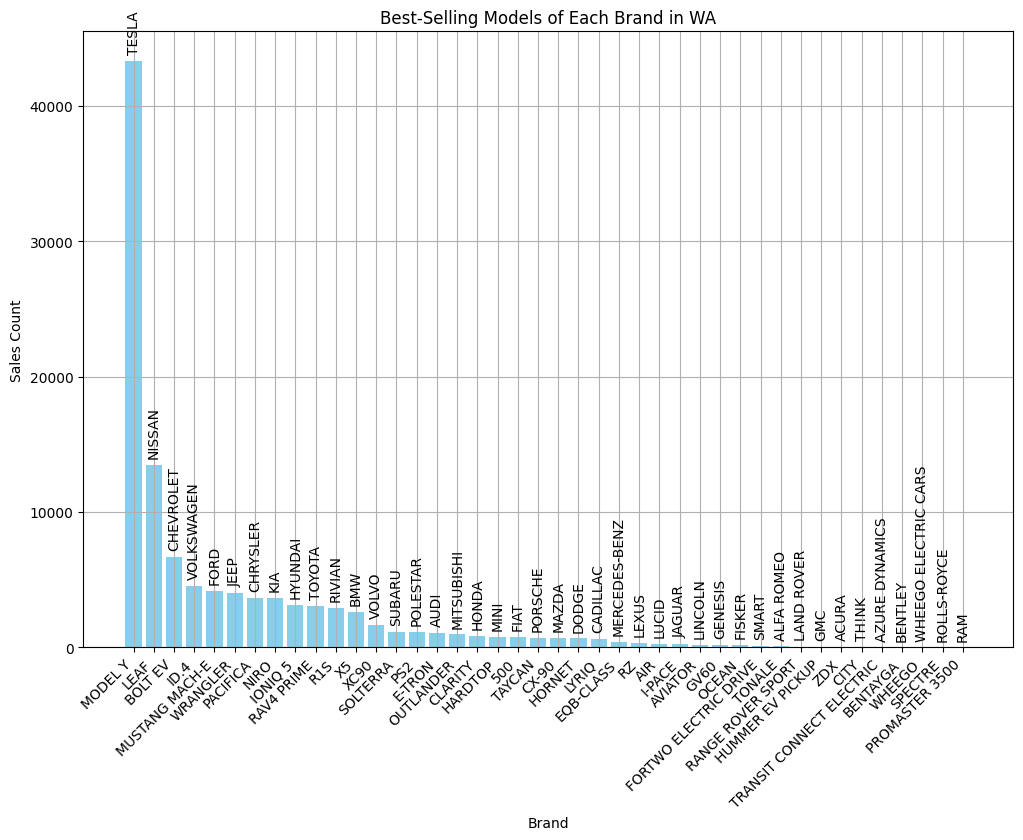

In [21]:
# Group by 'Make' and 'Model' and count occurrences
model_counts = wa_data.groupby(['Make', 'Model']).size().reset_index(name='Count')

# Find the best-selling model for each brand
best_selling_models = model_counts.loc[model_counts.groupby('Make')['Count'].idxmax()]

# Reset the index, rename the columns, and sort by 'Sales Count' in descending order
best_selling_models = best_selling_models.reset_index(drop=True).rename(columns={'Make': 'Brand', 'Model': 'Best-Selling Model', 'Count': 'Sales Count'})
best_selling_models = best_selling_models.sort_values(by='Sales Count', ascending=False)
print(best_selling_models)

# Plotting the bar graph
plt.figure(figsize=(12, 8))
bars = plt.bar(best_selling_models['Best-Selling Model'], best_selling_models['Sales Count'], color='skyblue')

# Annotate the bars with the model names
for bar, model in zip(bars, best_selling_models['Brand']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, model, ha='center', va='bottom', rotation=90)

plt.xlabel('Brand')
plt.ylabel('Sales Count')
plt.title('Best-Selling Models of Each Brand in WA')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Display the plot
plt.show()


### 3. Best selling brand of each EV type (WA)

                                  EV Type   Brand  Sales Count
0          Battery Electric Vehicle (BEV)   TESLA        90099
1  Plug-in Hybrid Electric Vehicle (PHEV)  TOYOTA         7010


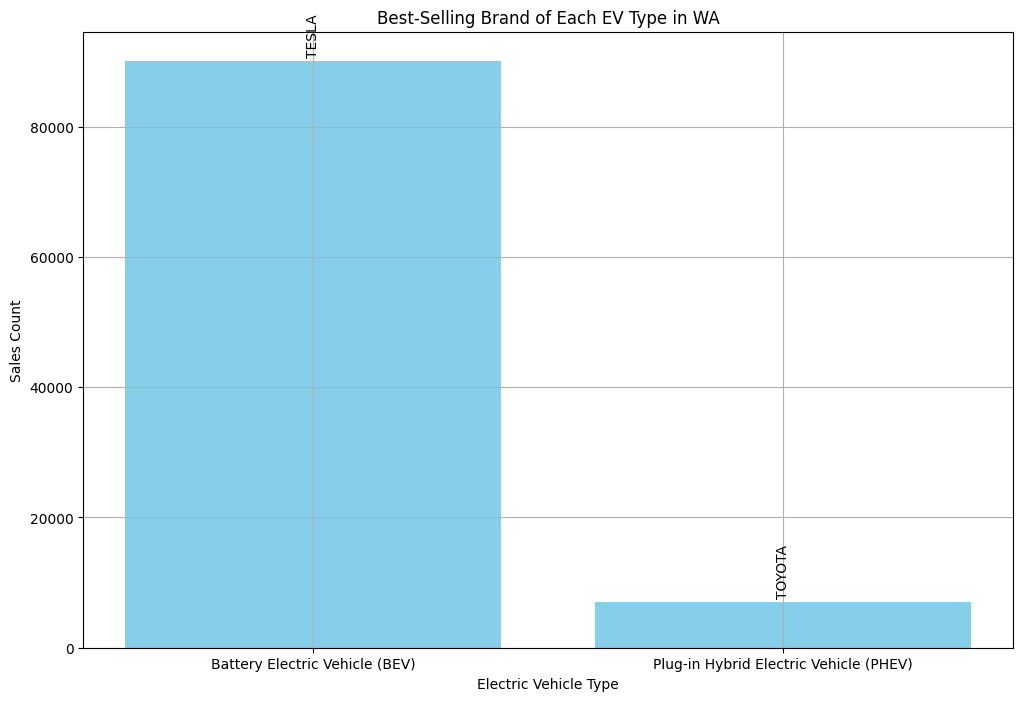

In [43]:
# Group by 'Electric Vehicle Type', 'Make', and 'Model' and count occurrences
ev_model_counts = wa_data.groupby(['Electric Vehicle Type', 'Make']).size().reset_index(name='Count')

# Find the best-selling model for each EV type
best_selling_ev_models = ev_model_counts.loc[ev_model_counts.groupby('Electric Vehicle Type')['Count'].idxmax()]

# Reset the index, rename the columns, and sort by 'Sales Count' in descending order
best_selling_ev_models = best_selling_ev_models.reset_index(drop=True).rename(columns={'Electric Vehicle Type': 'EV Type', 'Make': 'Brand',  'Count': 'Sales Count'})
best_selling_ev_models = best_selling_ev_models.sort_values(by='Sales Count', ascending=False)
print(best_selling_ev_models)
# Plotting the bar graph
plt.figure(figsize=(12, 8))
bars = plt.bar(best_selling_ev_models['EV Type'], best_selling_ev_models['Sales Count'], color='skyblue')

# Annotate the bars with the brand names
for bar, brand in zip(bars, best_selling_ev_models['Brand']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, brand, ha='center', va='bottom', rotation=90)

plt.xlabel('Electric Vehicle Type')
plt.ylabel('Sales Count')
plt.title('Best-Selling Brand of Each EV Type in WA')
plt.xticks()
plt.grid(True)

# Display the plot
plt.show()


### 4. Best selling model of each EV type (WA)

                                  EV Type Best-Selling Model  Sales Count
0          Battery Electric Vehicle (BEV)            MODEL Y        43342
1  Plug-in Hybrid Electric Vehicle (PHEV)               VOLT         4818


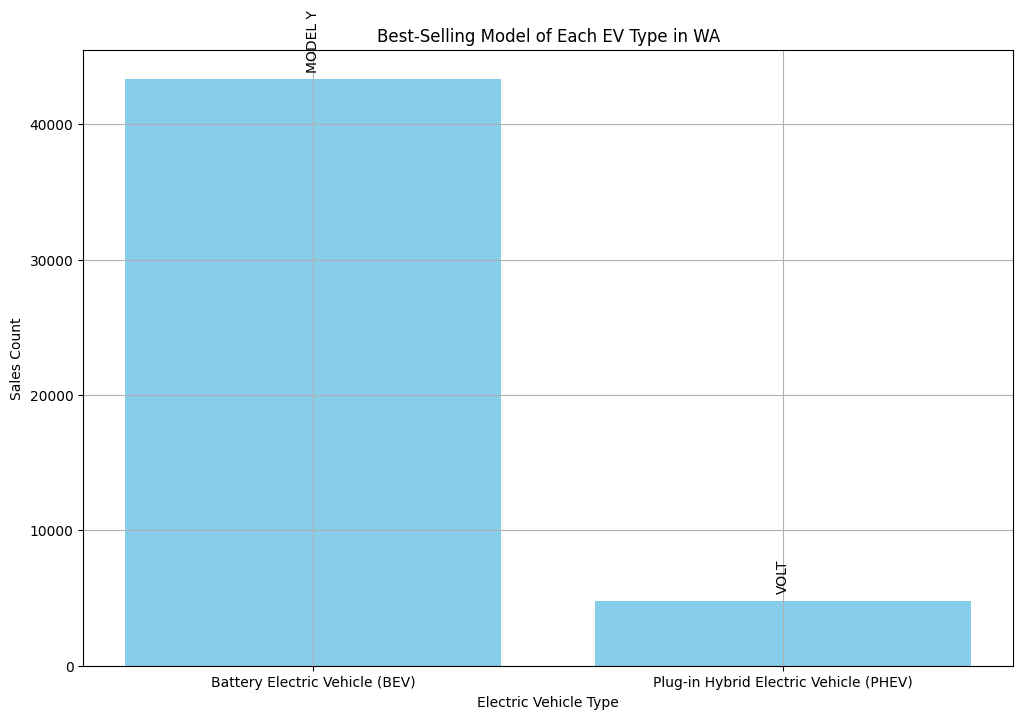

In [45]:
# Group by 'Electric Vehicle Type', 'Make', and 'Model' and count occurrences
ev_model_counts = wa_data.groupby(['Electric Vehicle Type', 'Model']).size().reset_index(name='Count')

# Find the best-selling model for each EV type
best_selling_ev_models = ev_model_counts.loc[ev_model_counts.groupby('Electric Vehicle Type')['Count'].idxmax()]

# Reset the index, rename the columns, and sort by 'Sales Count' in descending order
best_selling_ev_models = best_selling_ev_models.reset_index(drop=True).rename(columns={'Electric Vehicle Type': 'EV Type', 'Model': 'Best-Selling Model',  'Count': 'Sales Count'})
best_selling_ev_models = best_selling_ev_models.sort_values(by='Sales Count', ascending=False)
print(best_selling_ev_models)
# Plotting the bar graph
plt.figure(figsize=(12, 8))
bars = plt.bar(best_selling_ev_models['EV Type'], best_selling_ev_models['Sales Count'], color='skyblue')

# Annotate the bars with the brand names
for bar, brand in zip(bars, best_selling_ev_models['Best-Selling Model']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, brand, ha='center', va='bottom', rotation=90)

plt.xlabel('Electric Vehicle Type')
plt.ylabel('Sales Count')
plt.title('Best-Selling Model of Each EV Type in WA')
plt.xticks()
plt.grid(True)

# Display the plot
plt.show()
